In [16]:
from datetime import datetime as dt

import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import cm

import numpy as np
COLORS = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#f6bd60', '#e76f51', '#2a9d8f',  "#900c3f",  "#7d8f69", "#b3bfd1",]

local_base_path = '/Users/noamazmon/PycharmProjects/network_modularity'
base_path = '/Volumes/noamaz/modularity'

In [17]:
res_path =   '2023-03-28-17-07-47_first_analysis.csv'
all_res = pd.read_csv(f"{base_path}/{res_path}")

In [18]:
fully_connected_num_connection = 108
all_res['connectivity'] = all_res['num_connections']/fully_connected_num_connection
time_str = dt.now().strftime("%Y-%m-%d-%H-%M-%S")

In [19]:
all_res.shape

(20031, 13)

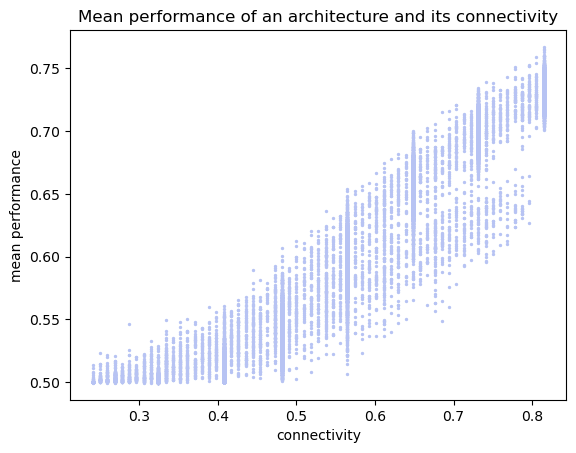

In [20]:
plt.figure()
plt.scatter(all_res['connectivity'], all_res['mean_performance'], c=COLORS[1],
           s=2)
plt.ylabel('mean performance')
plt.xlabel('connectivity')
plt.title('Mean performance of an architecture and its connectivity')
plt.savefig(f"{local_base_path}/plots/xor_teachbility_plots/{time_str}_performance_vs_connectivity.png")

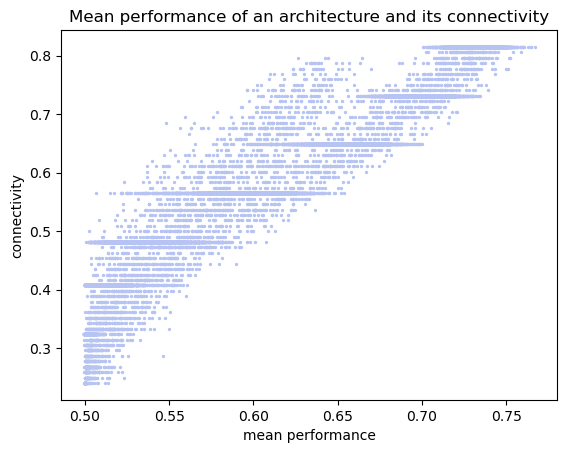

In [21]:
plt.figure()
plt.scatter( all_res['mean_performance'], all_res['connectivity'], c=COLORS[1],
           s=2)
plt.xlabel('mean performance')
plt.ylabel('connectivity')
plt.title('Mean performance of an architecture and its connectivity')
plt.savefig(f"{local_base_path}/plots/xor_teachbility_plots/{time_str}_connectivity_vs_performance.png")


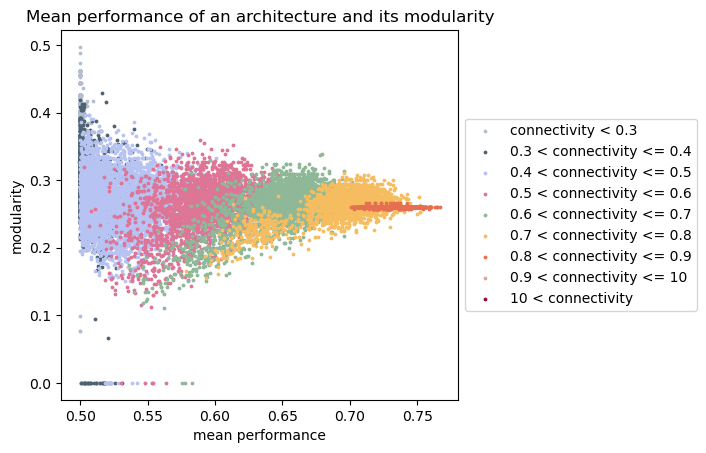

In [22]:
plt.figure()
ax = plt.subplot(111)
COLORS = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#f6bd60', '#e76f51', '#e1a692',  "#900c3f",  "#7d8f69", "#b3bfd1",]

connectivities = [0.3,0.4,0.5,0.6,0.7,0.8,0.9,10]
ax.scatter(all_res['mean_performance'][all_res['connectivity'] <= connectivities[0]], all_res['modularity'][all_res['connectivity'] < connectivities[0]], c=COLORS[-1],
           s=3,  label=f'connectivity < {connectivities[0]}')
for i in range(len(connectivities)-1):
    ax.scatter(all_res['mean_performance'][all_res['connectivity'].between(connectivities[i], connectivities[i+1])], all_res['modularity'][all_res['connectivity'].between(connectivities[i], connectivities[i+1])], c=COLORS[i],
           s=3,  label=f'{connectivities[i]} < connectivity <= {connectivities[i+1]}')
ax.scatter(all_res['mean_performance'][all_res['connectivity'] > connectivities[i+1]], all_res['modularity'][all_res['connectivity'] > connectivities[i+1]], c=COLORS[i+1],
           s=3,  label=f'{connectivities[i+1]} < connectivity')

plt.xlabel('mean performance')
plt.ylabel('modularity')
plt.title('Mean performance of an architecture and its modularity')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig(f"{local_base_path}/plots/xor_teachbility_plots/{time_str}_modularity_vs_performance_bu_connectivity.png")


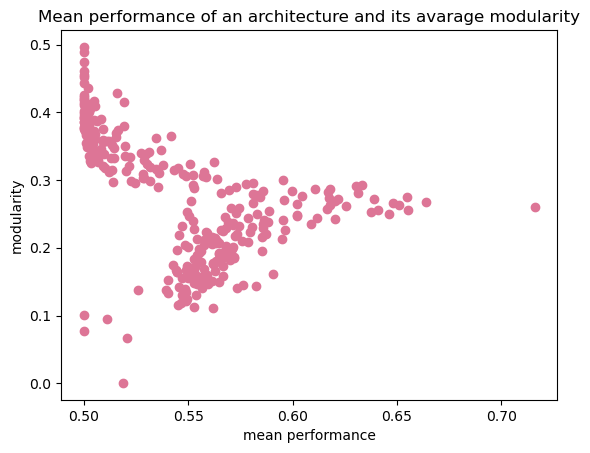

In [23]:
vals = np.linspace(all_res['modularity'].min(), all_res['modularity'].max(), 500)
bins = vals.tolist()
labels = [(vals[i] + vals[i + 1]) / 2 for i in range(len(vals) - 1)]
all_res['modularity_2'] = pd.cut(x=all_res['modularity'], bins=bins, labels=labels, include_lowest=True)
r2 = all_res.groupby(['modularity_2'], as_index=False).agg(
    {'mean_performance': ['mean']}).dropna()
plt.scatter( r2['mean_performance'], r2['modularity_2'], c=COLORS[2])
plt.xlabel('mean performance')
plt.ylabel('modularity')
plt.title('Mean performance of an architecture and its avarage modularity')
plt.savefig(f"{local_base_path}/plots/xor_teachbility_plots/{time_str}_modularity_vs_mean_performance.png")
plt.show()

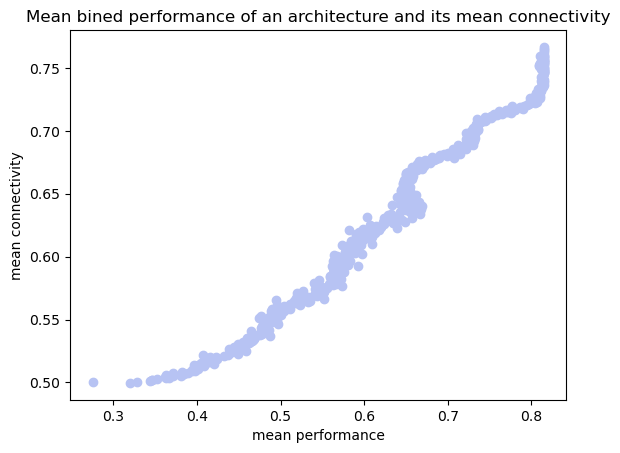

In [35]:
vals = np.linspace(all_res['mean_performance'].min(), all_res['mean_performance'].max(), 500)
bins = vals.tolist()
labels = [(vals[i] + vals[i + 1]) / 2 for i in range(len(vals) - 1)]
all_res['mean_performance_2'] = pd.cut(x=all_res['mean_performance'], bins=bins, labels=labels, include_lowest=True)
r2 = all_res.groupby(['mean_performance_2'], as_index=False).agg(
    {'connectivity': ['mean']}).dropna()
plt.scatter( r2['connectivity'],  r2['mean_performance_2'], c=COLORS[1])
plt.xlabel('mean performance')
plt.ylabel('mean connectivity')
plt.title('Mean bined performance of an architecture and its mean connectivity')
plt.savefig(f"{local_base_path}/plots/xor_teachbility_plots/{time_str}_mean_connectivity_vs_mean_performance.png")
plt.show()

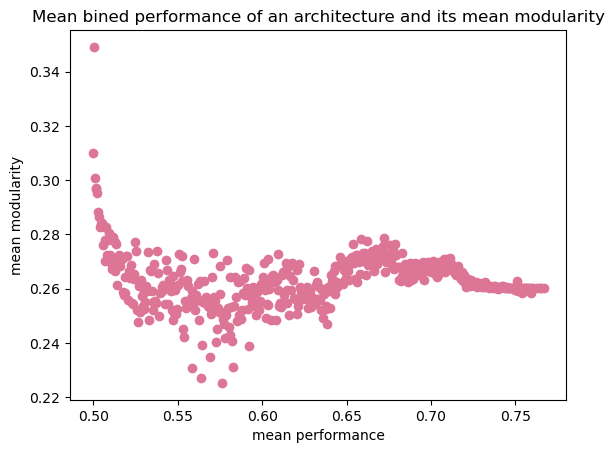

In [24]:
vals = np.linspace(all_res['mean_performance'].min(), all_res['mean_performance'].max(), 500)
bins = vals.tolist()
labels = [(vals[i] + vals[i + 1]) / 2 for i in range(len(vals) - 1)]
all_res['mean_performance_2'] = pd.cut(x=all_res['mean_performance'], bins=bins, labels=labels, include_lowest=True)
r2 = all_res.groupby(['mean_performance_2'], as_index=False).agg(
    {'modularity': ['mean']}).dropna()
plt.scatter( r2['mean_performance_2'], r2['modularity'], c=COLORS[2])
plt.xlabel('mean performance')
plt.ylabel('mean modularity')
plt.title('Mean bined performance of an architecture and its mean modularity')
plt.savefig(f"{local_base_path}/plots/xor_teachbility_plots/{time_str}_mean_modularity_vs_mean_performance.png")
plt.show()

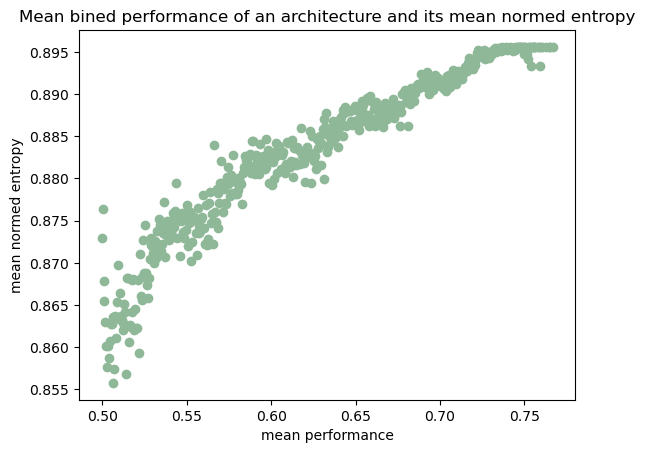

In [25]:
vals = np.linspace(all_res['mean_performance'].min(), all_res['mean_performance'].max(), 500)
bins = vals.tolist()
labels = [(vals[i] + vals[i + 1]) / 2 for i in range(len(vals) - 1)]
all_res['mean_performance_2'] = pd.cut(x=all_res['mean_performance'], bins=bins, labels=labels, include_lowest=True)
r2 = all_res.groupby(['mean_performance_2'], as_index=False).agg(
    {'normed_entropy': ['mean']}).dropna()
plt.scatter( r2['mean_performance_2'], r2['normed_entropy'], c=COLORS[3])
plt.xlabel('mean performance')
plt.ylabel('mean normed entropy')
plt.title('Mean bined performance of an architecture and its mean normed entropy')
plt.savefig(f"{local_base_path}/plots/xor_teachbility_plots/{time_str}_mean_normed_entropy_vs_mean_performance.png")

plt.show()

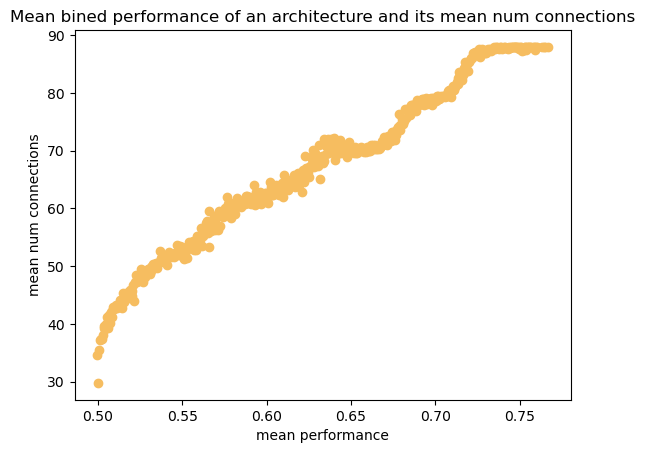

In [26]:
vals = np.linspace(all_res['mean_performance'].min(), all_res['mean_performance'].max(), 500)
bins = vals.tolist()
labels = [(vals[i] + vals[i + 1]) / 2 for i in range(len(vals) - 1)]
all_res['mean_performance_2'] = pd.cut(x=all_res['mean_performance'], bins=bins, labels=labels, include_lowest=True)
r2 = all_res.groupby(['mean_performance_2'], as_index=False).agg(
    {'num_connections': ['mean']}).dropna()
plt.scatter( r2['mean_performance_2'], r2['num_connections'], c=COLORS[4])
plt.xlabel('mean performance')
plt.ylabel('mean num connections')
plt.title('Mean bined performance of an architecture and its mean num connections')
plt.savefig(f"{local_base_path}/plots/xor_teachbility_plots/{time_str}_mean_num_connections_vs_performance.png")

plt.show()

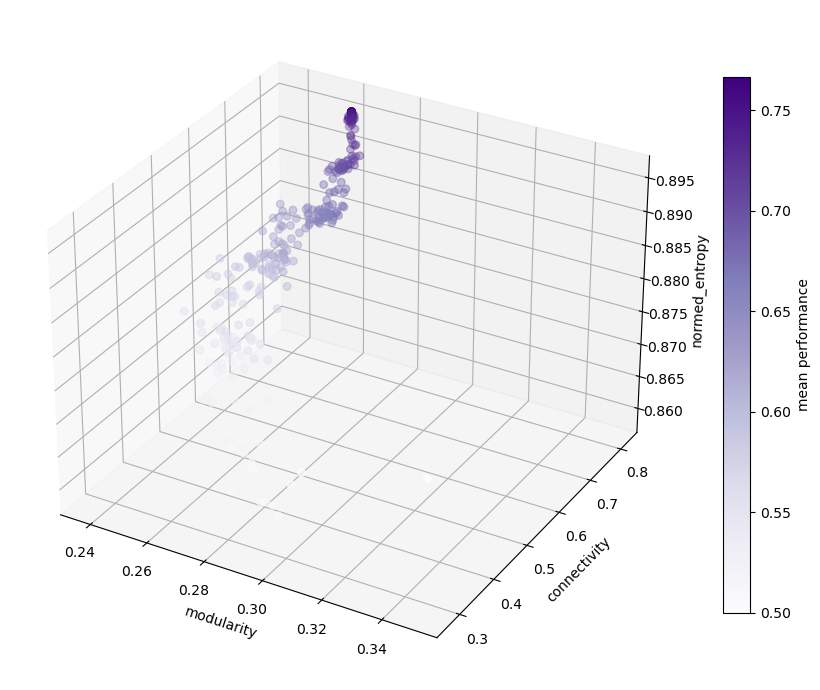

In [27]:
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')
vals = np.linspace(all_res['mean_performance'].min(), all_res['mean_performance'].max(), 300)
bins = vals.tolist()
labels = [(vals[i] + vals[i + 1]) / 2 for i in range(len(vals) - 1)]
all_res['mean_performance_2'] = pd.cut(x=all_res['mean_performance'], bins=bins, labels=labels, include_lowest=True)
r2 = all_res.groupby(['mean_performance_2'], as_index=False).agg(
    {'normed_entropy': ['mean'], 'modularity': ['mean'], 'connectivity': ['mean']}).dropna()
x, y, z = [ 'normed_entropy','modularity', 'connectivity',]
x, y, z = ['connectivity', 'normed_entropy','modularity',]
x, y, z = ['connectivity','modularity', 'normed_entropy',]
x, y, z = ['modularity', 'normed_entropy', 'connectivity']
x, y, z = [ 'normed_entropy', 'num_connections','modularity',] #
x, y, z = [ 'normed_entropy', 'modularity', 'num_connections'] #

x, y, z = [  'modularity', 'connectivity', 'normed_entropy'] #


p3d = ax.scatter(r2[x], r2[y], r2[z], s=30, c=np.linspace( r2['mean_performance_2'].min(), r2['mean_performance_2'].max(), num=r2['mean_performance_2'].shape[0]),
                 cmap='Purples')
fig.colorbar(p3d, pad=0.05, shrink=0.8, location='right', label='mean performance')

ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
ax.set_title('')
plt.tight_layout()
plt.savefig(f"{local_base_path}/plots/xor_teachbility_plots/{time_str}_modularity_num_connections_normed_entropy_performance.png")
plt.show()


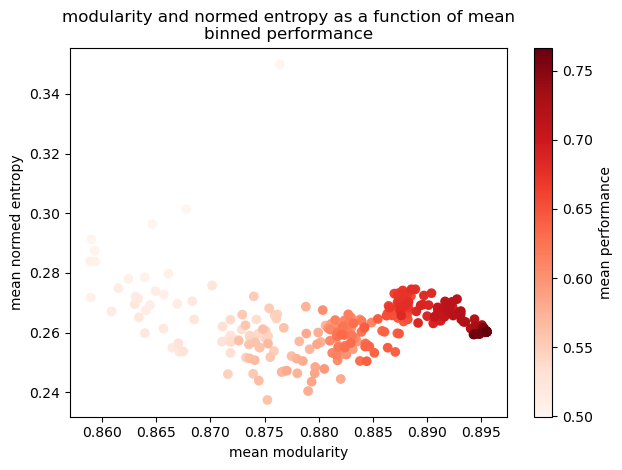

In [42]:
vals = np.linspace(all_res['mean_performance'].min(), all_res['mean_performance'].max(), 300)
bins = vals.tolist()
labels = [(vals[i] + vals[i + 1]) / 2 for i in range(len(vals) - 1)]
all_res['mean_performance_2'] = pd.cut(x=all_res['mean_performance'], bins=bins, labels=labels, include_lowest=True)
r2 = all_res.groupby(['mean_performance_2'], as_index=False).agg(
    {'normed_entropy': ['mean'], 'modularity': ['mean'],}).dropna()
fig = plt.figure()
ax = fig.add_subplot(111, )
p3d = ax.scatter(r2['normed_entropy'], r2['modularity'],
c=np.linspace( r2['mean_performance_2'].min(), r2['mean_performance_2'].max(), num=r2['mean_performance_2'].shape[0]),
                 cmap='Reds')
labels = sorted({f'{x:.1f}' for x in r2['mean_performance_2']})
handles, _ = p3d.legend_elements(prop="sizes", num=len(labels) + 1, alpha=0.6)
ax.set_xlabel('mean modularity')
ax.set_ylabel('mean normed entropy')
ax.set_title('modularity and normed entropy as a function of mean\nbinned performance')
fig.colorbar(p3d, pad=0.05, location='right', label='mean performance')
plt.tight_layout()
plt.savefig(f"{local_base_path}/plots/xor_teachbility_plots/{time_str}_mean_normed_entropy_vs_mean_modularity_by_performance.png")
plt.show()

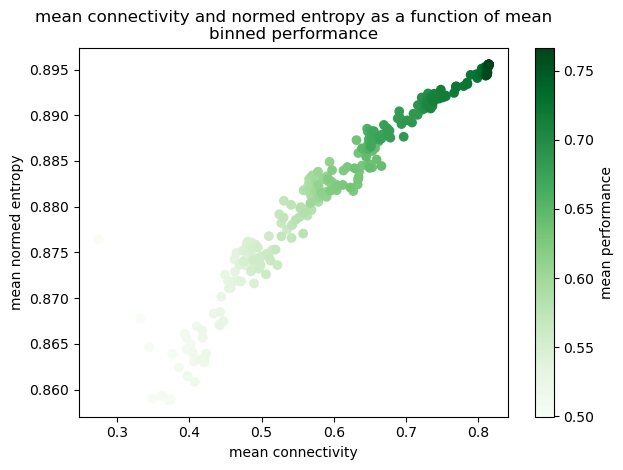

In [41]:
vals = np.linspace(all_res['mean_performance'].min(), all_res['mean_performance'].max(), 300)
bins = vals.tolist()
labels = [(vals[i] + vals[i + 1]) / 2 for i in range(len(vals) - 1)]
all_res['mean_performance_2'] = pd.cut(x=all_res['mean_performance'], bins=bins, labels=labels, include_lowest=True)
r2 = all_res.groupby(['mean_performance_2'], as_index=False).agg(
    {'connectivity': ['mean'], 'normed_entropy': ['mean'],}).dropna()
fig = plt.figure()
ax = fig.add_subplot(111, )
p3d = ax.scatter(r2['connectivity'], r2['normed_entropy'],
c=np.linspace( r2['mean_performance_2'].min(), r2['mean_performance_2'].max(), num=r2['mean_performance_2'].shape[0]),
                 cmap='Greens')
labels = sorted({f'{x:.1f}' for x in r2['mean_performance_2']})
handles, _ = p3d.legend_elements(prop="sizes", num=len(labels) + 1, alpha=0.6)
ax.set_xlabel('mean connectivity')
ax.set_ylabel('mean normed entropy')
ax.set_title('mean connectivity and normed entropy as a function of mean\nbinned performance')
fig.colorbar(p3d, pad=0.05, location='right', label='mean performance')
plt.tight_layout()
plt.savefig(f"{local_base_path}/plots/xor_teachbility_plots/{time_str}_mean_normed_entropy_vs_mean_connectivity_by_performance.png")
plt.show()

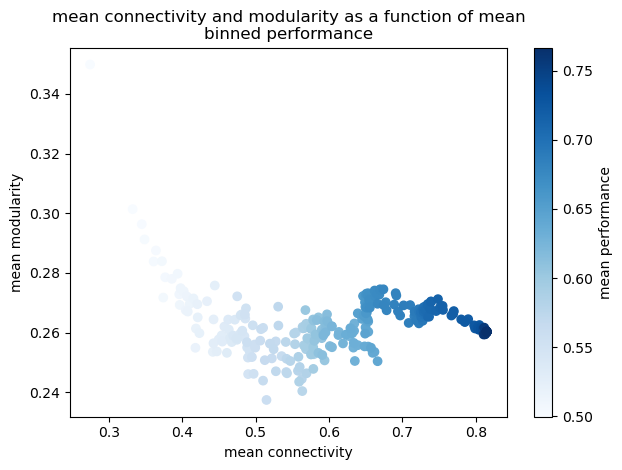

In [40]:
vals = np.linspace(all_res['mean_performance'].min(), all_res['mean_performance'].max(), 300)
bins = vals.tolist()
labels = [(vals[i] + vals[i + 1]) / 2 for i in range(len(vals) - 1)]
all_res['mean_performance_2'] = pd.cut(x=all_res['mean_performance'], bins=bins, labels=labels, include_lowest=True)
r2 = all_res.groupby(['mean_performance_2'], as_index=False).agg(
    {'connectivity': ['mean'], 'modularity': ['mean'],}).dropna()
fig = plt.figure()
ax = fig.add_subplot(111, )
p3d = ax.scatter(r2['connectivity'], r2['modularity'],
c=np.linspace( r2['mean_performance_2'].min(), r2['mean_performance_2'].max(), num=r2['mean_performance_2'].shape[0]),
                 cmap='Blues')
labels = sorted({f'{x:.1f}' for x in r2['mean_performance_2']})
handles, _ = p3d.legend_elements(prop="sizes", num=len(labels) + 1, alpha=0.6)
ax.set_xlabel('mean connectivity')
ax.set_ylabel('mean modularity')
ax.set_title('mean connectivity and modularity as a function of mean\nbinned performance')
fig.colorbar(p3d, pad=0.05, location='right', label='mean performance')
plt.tight_layout()
plt.savefig(f"{local_base_path}/plots/xor_teachbility_plots/{time_str}_mean_modularity_vs_mean_connectivity_by_performance.png")
plt.show()

In [30]:
np.linspace( r2['mean_performance_2'].min(), r2['mean_performance_2'].max(), num=490)

array([0.49982253, 0.50036798, 0.50091344, 0.50145889, 0.50200435,
       0.5025498 , 0.50309526, 0.50364071, 0.50418617, 0.50473162,
       0.50527708, 0.50582253, 0.50636799, 0.50691344, 0.5074589 ,
       0.50800435, 0.50854981, 0.50909526, 0.50964072, 0.51018617,
       0.51073163, 0.51127708, 0.51182254, 0.51236799, 0.51291344,
       0.5134589 , 0.51400435, 0.51454981, 0.51509526, 0.51564072,
       0.51618617, 0.51673163, 0.51727708, 0.51782254, 0.51836799,
       0.51891345, 0.5194589 , 0.52000436, 0.52054981, 0.52109527,
       0.52164072, 0.52218618, 0.52273163, 0.52327709, 0.52382254,
       0.524368  , 0.52491345, 0.52545891, 0.52600436, 0.52654982,
       0.52709527, 0.52764073, 0.52818618, 0.52873163, 0.52927709,
       0.52982254, 0.530368  , 0.53091345, 0.53145891, 0.53200436,
       0.53254982, 0.53309527, 0.53364073, 0.53418618, 0.53473164,
       0.53527709, 0.53582255, 0.536368  , 0.53691346, 0.53745891,
       0.53800437, 0.53854982, 0.53909528, 0.53964073, 0.54018

In [31]:
bad_res.rename(columns={"connectivity_ratio": "connectivity", })

NameError: name 'bad_res' is not defined

In [ ]:
for c in ['modularity', 'num_connections',
       'median_performance', 'mean_performance', 'connectivity', 'sum_weight',
       'entropy', 'normed_entropy']:
    print(f"mean {c}: all_res: {all_res[c].mean():.3f},  bad_res: {bad_res[c].mean():.3f}, ")

In [18]:
print(all_res.columns)

Index(['Unnamed: 0', 'exp_name', 'modularity', 'num_connections',
       'median_performance', 'mean_performance', 'connectivity', 'sum_weight',
       'entropy', 'normed_entropy', 'num_successes_1.0', 'success_percent_1.0',
       'num_successes_0.9', 'success_percent_0.9', 'num_successes_0.97',
       'success_percent_0.97'],
      dtype='object')
